In [2]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

home = '/home/kojo/Code/temporary-trvae-clone'
os.chdir(home)

In [3]:
specific_cell_type = "3m"
trvae_reconstructed = sc.read(f"./data/reconstructed/trVAE_alzPro/{specific_cell_type}.h5ad")
trvae_reconstructed.obs

,Qi ID,sex,Group,Timepoint,n_counts,batch
8-0,3346,F,WT_to_HET,3m,6.196362e+09,0
9-0,3347,F,WT_to_HET,3m,6.794262e+09,0
10-0,3388,F,WT_to_HET,3m,7.239526e+09,0
11-0,3389,F,WT_to_HET,3m,6.479385e+09,0
12-0,3606,M,WT_to_HET,3m,7.353696e+09,0
13-0,3607,M,WT_to_HET,3m,8.290053e+09,0
14-0,3608,M,WT_to_HET,3m,6.614078e+09,0
15-0,3609,M,WT_to_HET,3m,8.094854e+09,0
0-1,3131,M,HET,3m,5.458209e+09,1
1-1,3132,M,HET,3m,7.439315e+09,1


In [4]:
dist1 = trvae_reconstructed[trvae_reconstructed.obs["Group"] == "WT_to_HET"]
dist1.obs

,Qi ID,sex,Group,Timepoint,n_counts,batch
8-0,3346,F,WT_to_HET,3m,6.196362e+09,0
9-0,3347,F,WT_to_HET,3m,6.794262e+09,0
10-0,3388,F,WT_to_HET,3m,7.239526e+09,0
11-0,3389,F,WT_to_HET,3m,6.479385e+09,0
12-0,3606,M,WT_to_HET,3m,7.353696e+09,0
13-0,3607,M,WT_to_HET,3m,8.290053e+09,0
14-0,3608,M,WT_to_HET,3m,6.614078e+09,0
15-0,3609,M,WT_to_HET,3m,8.094854e+09,0


In [5]:
dist2 = trvae_reconstructed[trvae_reconstructed.obs["Group"] == "HET"]
dist2.obs

,Qi ID,sex,Group,Timepoint,n_counts,batch
0-1,3131,M,HET,3m,5.458209e+09,1
1-1,3132,M,HET,3m,7.439315e+09,1
2-1,3140,M,HET,3m,6.016821e+09,1
3-1,3141,M,HET,3m,7.549487e+09,1
4-1,3153,F,HET,3m,7.475885e+09,1
5-1,3154,F,HET,3m,7.624840e+09,1
6-1,3156,F,HET,3m,4.729855e+09,1
7-1,3157,F,HET,3m,7.761574e+09,1


In [6]:
print(len(dist1.X[0]))
print(dist1.var.index[0])

1729
A2A432|CUL4B


In [7]:
protein_meansR = {}
for i in range(1729):
    protein_meansR[sum(dist2.X[:,i])/len(dist2.X[:,i])] = dist1.var.index[i]

print(min(protein_meansR))

4.728686809539795


In [8]:
protein_meansP = {}
for i in range(1729):
    protein_meansP[sum(dist1.X[:,i])/len(dist1.X[:,i])] = dist1.var.index[i]

print(min(protein_meansP))

5.901030659675598


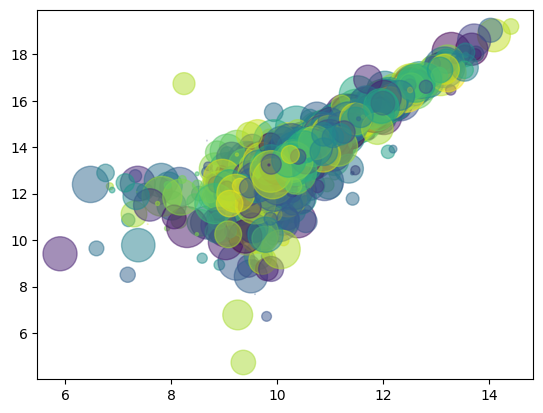

In [9]:
np.random.seed(2432532)

N = len(dist1.X[0])
x = list(protein_meansP.keys())
y = list(protein_meansR.keys())
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [10]:
protein_lists = sorted(protein_meansR.keys(), reverse=False)
protein_tests = {pval: protein_meansR[pval] for pval in protein_lists}
proteins = list(protein_tests.values())
proteins

['P07309|TTHY',
 'Q00612|G6PD1',
 'Q8BSS9|LIPA2',
 'Q9JK42|PDK2',
 'Q61290|CAC1E',
 'P51655|GPC4',
 'Q8K221|ARFP2',
 'Q9DBL1|ACDSB',
 'O55106|STRN',
 'P34914|HYES',
 'P97355|SPSY',
 'Q505F5|LRC47',
 'Q62426|CYTB',
 'Q8R2Y0|ABHD6',
 'Q8VHL1|SETD7',
 'Q03517|SCG2',
 'P62715|PP2AB',
 'Q80VC9|CAMP3',
 'Q9QZB7|ARP10',
 'Q61387|COX7R',
 'Q8R1B5|CPLX3',
 'Q8CDG3|VCIP1',
 'Q8VEH5|EPMIP',
 'O54988|SLK',
 'Q9D0R2|SYTC',
 'Q9DB73|NB5R1',
 'Q3UQ44|IQGA2',
 'Q99LG2|TNPO2',
 'Q9D8B7|JAM3',
 'Q9WVE8|PACN2',
 'Q9WVA3|BUB3',
 'Q9CQK7|RWDD1',
 'Q99KC8|VMA5A',
 'O88910|MPP3',
 'Q9D2V7|CORO7',
 'Q99LB2|DHRS4',
 'Q9JKW0|AR6P1',
 'O55026|ENTP2',
 'P97492|RGS14',
 'O70172|PI42A',
 'Q8K4G5|ABLM1',
 'Q61696|HS71A',
 'Q8CIN4|PAK2',
 'Q61234|SNTA1',
 'P58044|IDI1',
 'Q9D6Z1|NOP56',
 'Q9D154|ILEUA',
 'Q8VBY2|KKCC1',
 'Q921E2|RAB31',
 'Q80U49|C170B',
 'Q9QXW9|LAT2',
 'Q8C8N2|SCAI',
 'Q8C078|KKCC2',
 'O70194|EIF3D',
 'P29387|GBB4',
 'P51830|ADCY9',
 'Q60900|ELAV3',
 'Q6NS52|DGKB',
 'Q14BI2|GRM2',
 'Q08460|KCMA1',
 

In [11]:
protein_diffs = {}
for i in range(1729):
    protein_diffs[sum(dist1.X[:,i])/len(dist1.X[:,i]) - sum(dist2.X[:,i])/len(dist2.X[:,i])] = dist1.var.index[i]

print(max(protein_diffs))

4.634247660636902


In [12]:
protein_lists = sorted(protein_diffs.keys(), reverse=True)
protein_tests = {pval: protein_diffs[pval] for pval in protein_lists}
proteins = list(protein_tests.values())
proteins

['P07309|TTHY',
 'Q00612|G6PD1',
 'Q8BSS9|LIPA2',
 'Q9JK42|PDK2',
 'Q9DBL1|ACDSB',
 'Q61290|CAC1E',
 'Q8K221|ARFP2',
 'O55106|STRN',
 'Q8R2Y0|ABHD6',
 'P34914|HYES',
 'Q505F5|LRC47',
 'Q03517|SCG2',
 'Q9QZB7|ARP10',
 'P62715|PP2AB',
 'Q62426|CYTB',
 'Q8VEH5|EPMIP',
 'P97355|SPSY',
 'O54988|SLK',
 'Q99K48|NONO',
 'Q9D0R2|SYTC',
 'Q9DB73|NB5R1',
 'Q61831|MK10',
 'Q9WVE8|PACN2',
 'P13020|GELS',
 'Q6NS52|DGKB',
 'O35449|PRRT1',
 'Q99KC8|VMA5A',
 'Q8VHL1|SETD7',
 'P97371|PSME1',
 'Q3UQ44|IQGA2',
 'Q99LG2|TNPO2',
 'Q9Z1L5|CA2D3',
 'Q9D2V7|CORO7',
 'Q9D8B7|JAM3',
 'Q922E4|PCY2',
 'Q8K4G5|ABLM1',
 'P97492|RGS14',
 'Q8VBY2|KKCC1',
 'P51830|ADCY9',
 'Q8CDG3|VCIP1',
 'O70172|PI42A',
 'Q08460|KCMA1',
 'Q8C8N2|SCAI',
 'P16460|ASSY',
 'Q9D154|ILEUA',
 'Q9D6Z1|NOP56',
 'Q61234|SNTA1',
 'Q6PFD5|DLGP3',
 'Q61696|HS71A',
 'O88910|MPP3',
 'P14106|C1QB',
 'Q9QZF2|GPC1',
 'Q80U49|C170B',
 'O55026|ENTP2',
 'P97390|VPS45',
 'Q9CZS1|AL1B1',
 'Q8BNW9|KBTBB',
 'Q9WVA3|BUB3',
 'P46061|RAGP1',
 'Q8C078|KKCC2',
 '

In [13]:
proteins[:50]

['P07309|TTHY',
 'Q00612|G6PD1',
 'Q8BSS9|LIPA2',
 'Q9JK42|PDK2',
 'Q9DBL1|ACDSB',
 'Q61290|CAC1E',
 'Q8K221|ARFP2',
 'O55106|STRN',
 'Q8R2Y0|ABHD6',
 'P34914|HYES',
 'Q505F5|LRC47',
 'Q03517|SCG2',
 'Q9QZB7|ARP10',
 'P62715|PP2AB',
 'Q62426|CYTB',
 'Q8VEH5|EPMIP',
 'P97355|SPSY',
 'O54988|SLK',
 'Q99K48|NONO',
 'Q9D0R2|SYTC',
 'Q9DB73|NB5R1',
 'Q61831|MK10',
 'Q9WVE8|PACN2',
 'P13020|GELS',
 'Q6NS52|DGKB',
 'O35449|PRRT1',
 'Q99KC8|VMA5A',
 'Q8VHL1|SETD7',
 'P97371|PSME1',
 'Q3UQ44|IQGA2',
 'Q99LG2|TNPO2',
 'Q9Z1L5|CA2D3',
 'Q9D2V7|CORO7',
 'Q9D8B7|JAM3',
 'Q922E4|PCY2',
 'Q8K4G5|ABLM1',
 'P97492|RGS14',
 'Q8VBY2|KKCC1',
 'P51830|ADCY9',
 'Q8CDG3|VCIP1',
 'O70172|PI42A',
 'Q08460|KCMA1',
 'Q8C8N2|SCAI',
 'P16460|ASSY',
 'Q9D154|ILEUA',
 'Q9D6Z1|NOP56',
 'Q61234|SNTA1',
 'Q6PFD5|DLGP3',
 'Q61696|HS71A',
 'O88910|MPP3']

In [14]:
protein_tests

{4.634247660636902: 'P07309|TTHY',
 3.0900286436080933: 'Q00612|G6PD1',
 2.480890154838562: 'Q8BSS9|LIPA2',
 1.9158320426940918: 'Q9JK42|PDK2',
 1.1311231851577759: 'Q9DBL1|ACDSB',
 1.0667777061462402: 'Q61290|CAC1E',
 1.0656371116638184: 'Q8K221|ARFP2',
 0.8180757761001587: 'O55106|STRN',
 0.6095308065414429: 'Q8R2Y0|ABHD6',
 0.5852037668228149: 'P34914|HYES',
 0.543932318687439: 'Q505F5|LRC47',
 0.4977118968963623: 'Q03517|SCG2',
 0.4708505868911743: 'Q9QZB7|ARP10',
 0.3075937032699585: 'P62715|PP2AB',
 0.16446232795715332: 'Q62426|CYTB',
 0.13358056545257568: 'Q8VEH5|EPMIP',
 -0.02215898036956787: 'P97355|SPSY',
 -0.12908673286437988: 'O54988|SLK',
 -0.26370668411254883: 'Q99K48|NONO',
 -0.31942451000213623: 'Q9D0R2|SYTC',
 -0.321014404296875: 'Q9DB73|NB5R1',
 -0.3497215509414673: 'Q61831|MK10',
 -0.4450993537902832: 'Q9WVE8|PACN2',
 -0.47452616691589355: 'P13020|GELS',
 -0.5312236547470093: 'Q6NS52|DGKB',
 -0.54792320728302: 'O35449|PRRT1',
 -0.6169847249984741: 'Q99KC8|VMA5A',
 -0

In [15]:
protein_lists = sorted(protein_diffs.keys(), reverse=True)
protein_tests = {pval: protein_diffs[pval] for pval in protein_lists}
proteins = list(protein_tests.keys())
proteins

[4.634247660636902,
 3.0900286436080933,
 2.480890154838562,
 1.9158320426940918,
 1.1311231851577759,
 1.0667777061462402,
 1.0656371116638184,
 0.8180757761001587,
 0.6095308065414429,
 0.5852037668228149,
 0.543932318687439,
 0.4977118968963623,
 0.4708505868911743,
 0.3075937032699585,
 0.16446232795715332,
 0.13358056545257568,
 -0.02215898036956787,
 -0.12908673286437988,
 -0.26370668411254883,
 -0.31942451000213623,
 -0.321014404296875,
 -0.3497215509414673,
 -0.4450993537902832,
 -0.47452616691589355,
 -0.5312236547470093,
 -0.54792320728302,
 -0.6169847249984741,
 -0.6325880289077759,
 -0.6621717214584351,
 -0.6622073650360107,
 -0.6743887662887573,
 -0.711740255355835,
 -0.7202476263046265,
 -0.7529553174972534,
 -0.7712289094924927,
 -0.7921725511550903,
 -0.8244123458862305,
 -0.8275923728942871,
 -0.8593692779541016,
 -0.8694373369216919,
 -0.8694844245910645,
 -0.8830296993255615,
 -0.8868240118026733,
 -0.8910336494445801,
 -0.9525119066238403,
 -0.9700189828872681,
 -0.

In [16]:
means = pd.DataFrame(list(zip(x, y)), columns=['Predicted', 'Actual'])
means.head()

,Predicted,Actual
0,9.188467,12.507640
1,9.820089,12.609036
2,9.911287,13.315700
3,9.756261,12.838047
4,10.151922,13.337303


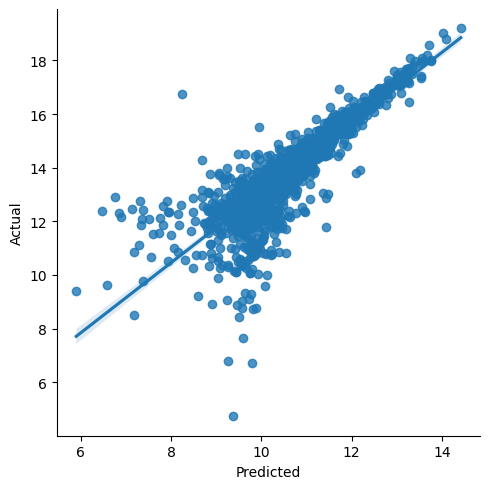

In [17]:
import seaborn as sb

sb.lmplot(x='Predicted', y='Actual', data=means)

In [19]:
from scipy import stats

stats.pearsonr(x, y)

(0.8571182316503079, 0.0)

In [20]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.9126869437563079, pvalue=0.0)